In [89]:
import plotnine as p
import scvi
import IPython
import warnings; warnings.simplefilter('ignore')
import os
import numpy as np
import pandas as pd
import torch
import anndata
from tqdm import tqdm
from umap import UMAP
from anndata import AnnData
from umap import UMAP
from fastTSNE import TSNE
from fastTSNE.callbacks import ErrorLogger
import datetime
import os
import matplotlib.pyplot as plt
from adjustText import adjust_text
import scanpy as sc
from gprofiler import GProfiler
from itertools import cycle, islice
import tissue_enrichment_analysis as tea
from sklearn.cluster import MiniBatchKMeans
import plotly.graph_objects as go

print('FINISHED IMPORTS')
# model_name=os.path.basename(__file__)
# model_name= model_name.strip('.py')
%config InlineBackend.figure_format = 'retina'
%pylab inline

FINISHED IMPORTS
Populating the interactive namespace from numpy and matplotlib


In [2]:
model_name='F3samples.100umis'


In [3]:
scvi.__version__

'0.7.1'

In [18]:
# adata = anndata.read(model_name+'/adata.h5ad')
adata = anndata.read(model_name+'.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 932950 × 14372
    obs: 'shortname', 'experiment_id', 'experiment_type', 'F', 'fastq_folder', 'barcode', 'experiment', 'umis', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'tsne1', 'tsne0', 'log10umi', 'kmeans300'
    var: 'gene_id', 'gene_name'
    uns: '_scvi'
    obsm: 'X_tsne'
    layers: 'counts'


In [19]:

# load_model
# adata = anndata.read('adata_leiden.h5ad')
print(adata)
# scvi.data.setup_anndata(adata, layer="counts")
print('WAAA')
model = scvi.model.SCVI.load(adata=adata, dir_path='./F3samples.100umis', use_cuda=True)
print(model)
### GET LATENT
latent = model.get_latent_representation() # get latent
print('loaded model and latent')

AnnData object with n_obs × n_vars = 932950 × 14372
    obs: 'shortname', 'experiment_id', 'experiment_type', 'F', 'fastq_folder', 'barcode', 'experiment', 'umis', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'tsne1', 'tsne0', 'log10umi', 'kmeans300'
    var: 'gene_id', 'gene_name'
    uns: '_scvi'
    obsm: 'X_tsne'
    layers: 'counts'
WAAA
INFO      Using data from adata.layers["counts"]                                             
INFO      Computing library size prior per batch                                             
INFO      Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']    
INFO      Successfully registered anndata object containing 932950 cells, 14372 vars, 13     
          batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates  
          and 0 extra continuous covariates.                                                 



loaded model and latent


In [20]:
scvi.data.view_anndata_setup(model.adata)

In [21]:
adata.obs

,shortname,experiment_id,experiment_type,F,fastq_folder,barcode,experiment,umis,_scvi_batch,_scvi_labels,_scvi_local_l_mean,_scvi_local_l_var,tsne1,tsne0,log10umi,kmeans300
AAACCCAAGAATCTAG-1-x0203_F3_ethanol05,x0203_F3_ethanol05,x0203_F3_ethanol05,ethanol05,F3,Allard_2_3_trial_2_F3Ethanol0_5percent,AAACCCAAGAATCTAG-1,x0203_F3_ethanol05,292,2,0,5.694975,0.158329,11.573621,34.873946,2.465383,283
AAACCCAAGAATTGCA-1-x0203_F3_ethanol05,x0203_F3_ethanol05,x0203_F3_ethanol05,ethanol05,F3,Allard_2_3_trial_2_F3Ethanol0_5percent,AAACCCAAGAATTGCA-1,x0203_F3_ethanol05,348,2,0,5.694975,0.158329,35.628945,1.514003,2.541579,261
AAACCCAAGACCCTTA-1-x0203_F3_ethanol05,x0203_F3_ethanol05,x0203_F3_ethanol05,ethanol05,F3,Allard_2_3_trial_2_F3Ethanol0_5percent,AAACCCAAGACCCTTA-1,x0203_F3_ethanol05,240,2,0,5.694975,0.158329,-30.807238,20.786124,2.380211,115
AAACCCAAGACTTAAG-1-x0203_F3_ethanol05,x0203_F3_ethanol05,x0203_F3_ethanol05,ethanol05,F3,Allard_2_3_trial_2_F3Ethanol0_5percent,AAACCCAAGACTTAAG-1,x0203_F3_ethanol05,188,2,0,5.694975,0.158329,18.820513,36.045624,2.274158,26
AAACCCAAGCAAGGAA-1-x0203_F3_ethanol05,x0203_F3_ethanol05,x0203_F3_ethanol05,ethanol05,F3,Allard_2_3_trial_2_F3Ethanol0_5percent,AAACCCAAGCAAGGAA-1,x0203_F3_ethanol05,324,2,0,5.694975,0.158329,-51.586996,37.642343,2.510545,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCCTTATCA-1-x0127_F3_water,x0127_F3_water,x0127_F3_water,water,F3,Allard_1_27_trial_1_F3water,TTTGTTGTCCTTATCA-1,x0127_F3_water,607,1,0,6.537445,0.353754,-31.099007,35.978224,2.783189,83
TTTGTTGTCGCATTAG-1-x0127_F3_water,x0127_F3_water,x0127_F3_water,water,F3,Allard_1_27_trial_1_F3water,TTTGTTGTCGCATTAG-1,x0127_F3_water,624,1,0,6.537445,0.353754,37.993786,34.854939,2.795185,210
TTTGTTGTCTACACAG-1-x0127_F3_water,x0127_F3_water,x0127_F3_water,water,F3,Allard_1_27_trial_1_F3water,TTTGTTGTCTACACAG-1,x0127_F3_water,834,1,0,6.537445,0.353754,11.708488,61.450597,2.921166,30
TTTGTTGTCTACTTCA-1-x0127_F3_water,x0127_F3_water,x0127_F3_water,water,F3,Allard_1_27_trial_1_F3water,TTTGTTGTCTACTTCA-1,x0127_F3_water,540,1,0,6.537445,0.353754,17.302062,20.800749,2.732394,140


# Do DE, add descriptions

In [25]:
allde = model.differential_expression(
    groupby="kmeans300",
)
allde['cluster']=allde.comparison.str.split(' vs Rest', expand=True)[0]
allde['-log10(p-value)']=np.log10(allde.proba_not_de)
allde.to_csv(model_name + '.kmeans300.allde.csv')
allde.head()


DE...: 100%|██████████| 300/300 [1:52:55<00:00, 22.59s/it]


,proba_de,proba_not_de,bayes_factor,scale1,scale2,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,cluster,-log10(p-value)
gene_ids,,,,,,,,,,,,,,,,,,,,
WBGene00001074,0.8680,0.1320,1.883390,0.000064,0.000080,-0.246248,-0.136094,2.396619,-7.494799,6.044439,0.018961,0.059270,0.016854,0.033535,0.516449,0.831765,False,0 vs Rest,0,-0.879426
WBGene00000711,0.8642,0.1358,1.850621,0.000035,0.000047,-0.327618,-0.178145,2.495919,-7.418989,5.891624,0.009129,0.036232,0.008778,0.021010,0.256224,0.476211,False,0 vs Rest,0,-0.867100
WBGene00194658,0.8636,0.1364,1.845518,0.000010,0.000013,-0.313651,-0.267888,1.751613,-5.337037,4.533208,0.004213,0.007784,0.002809,0.005534,0.114440,0.125271,False,0 vs Rest,0,-0.865186
WBGene00009639,0.8632,0.1368,1.842126,0.000012,0.000013,-0.072492,-0.107026,1.401067,-3.654012,4.003258,0.003511,0.007891,0.003511,0.005768,0.118128,0.125840,False,0 vs Rest,0,-0.863914
WBGene00017305,0.8630,0.1370,1.840434,0.000007,0.000009,-0.213312,-0.153921,1.579541,-7.836712,4.503727,0.003160,0.008503,0.002809,0.003500,0.098011,0.084123,False,0 vs Rest,0,-0.863279


***** 
 NOW DOING CLUSTER: 5
CLUSTERMASK_OBS
1566
5236  significant DEG
saved: ./reports/5.pdf
saved html


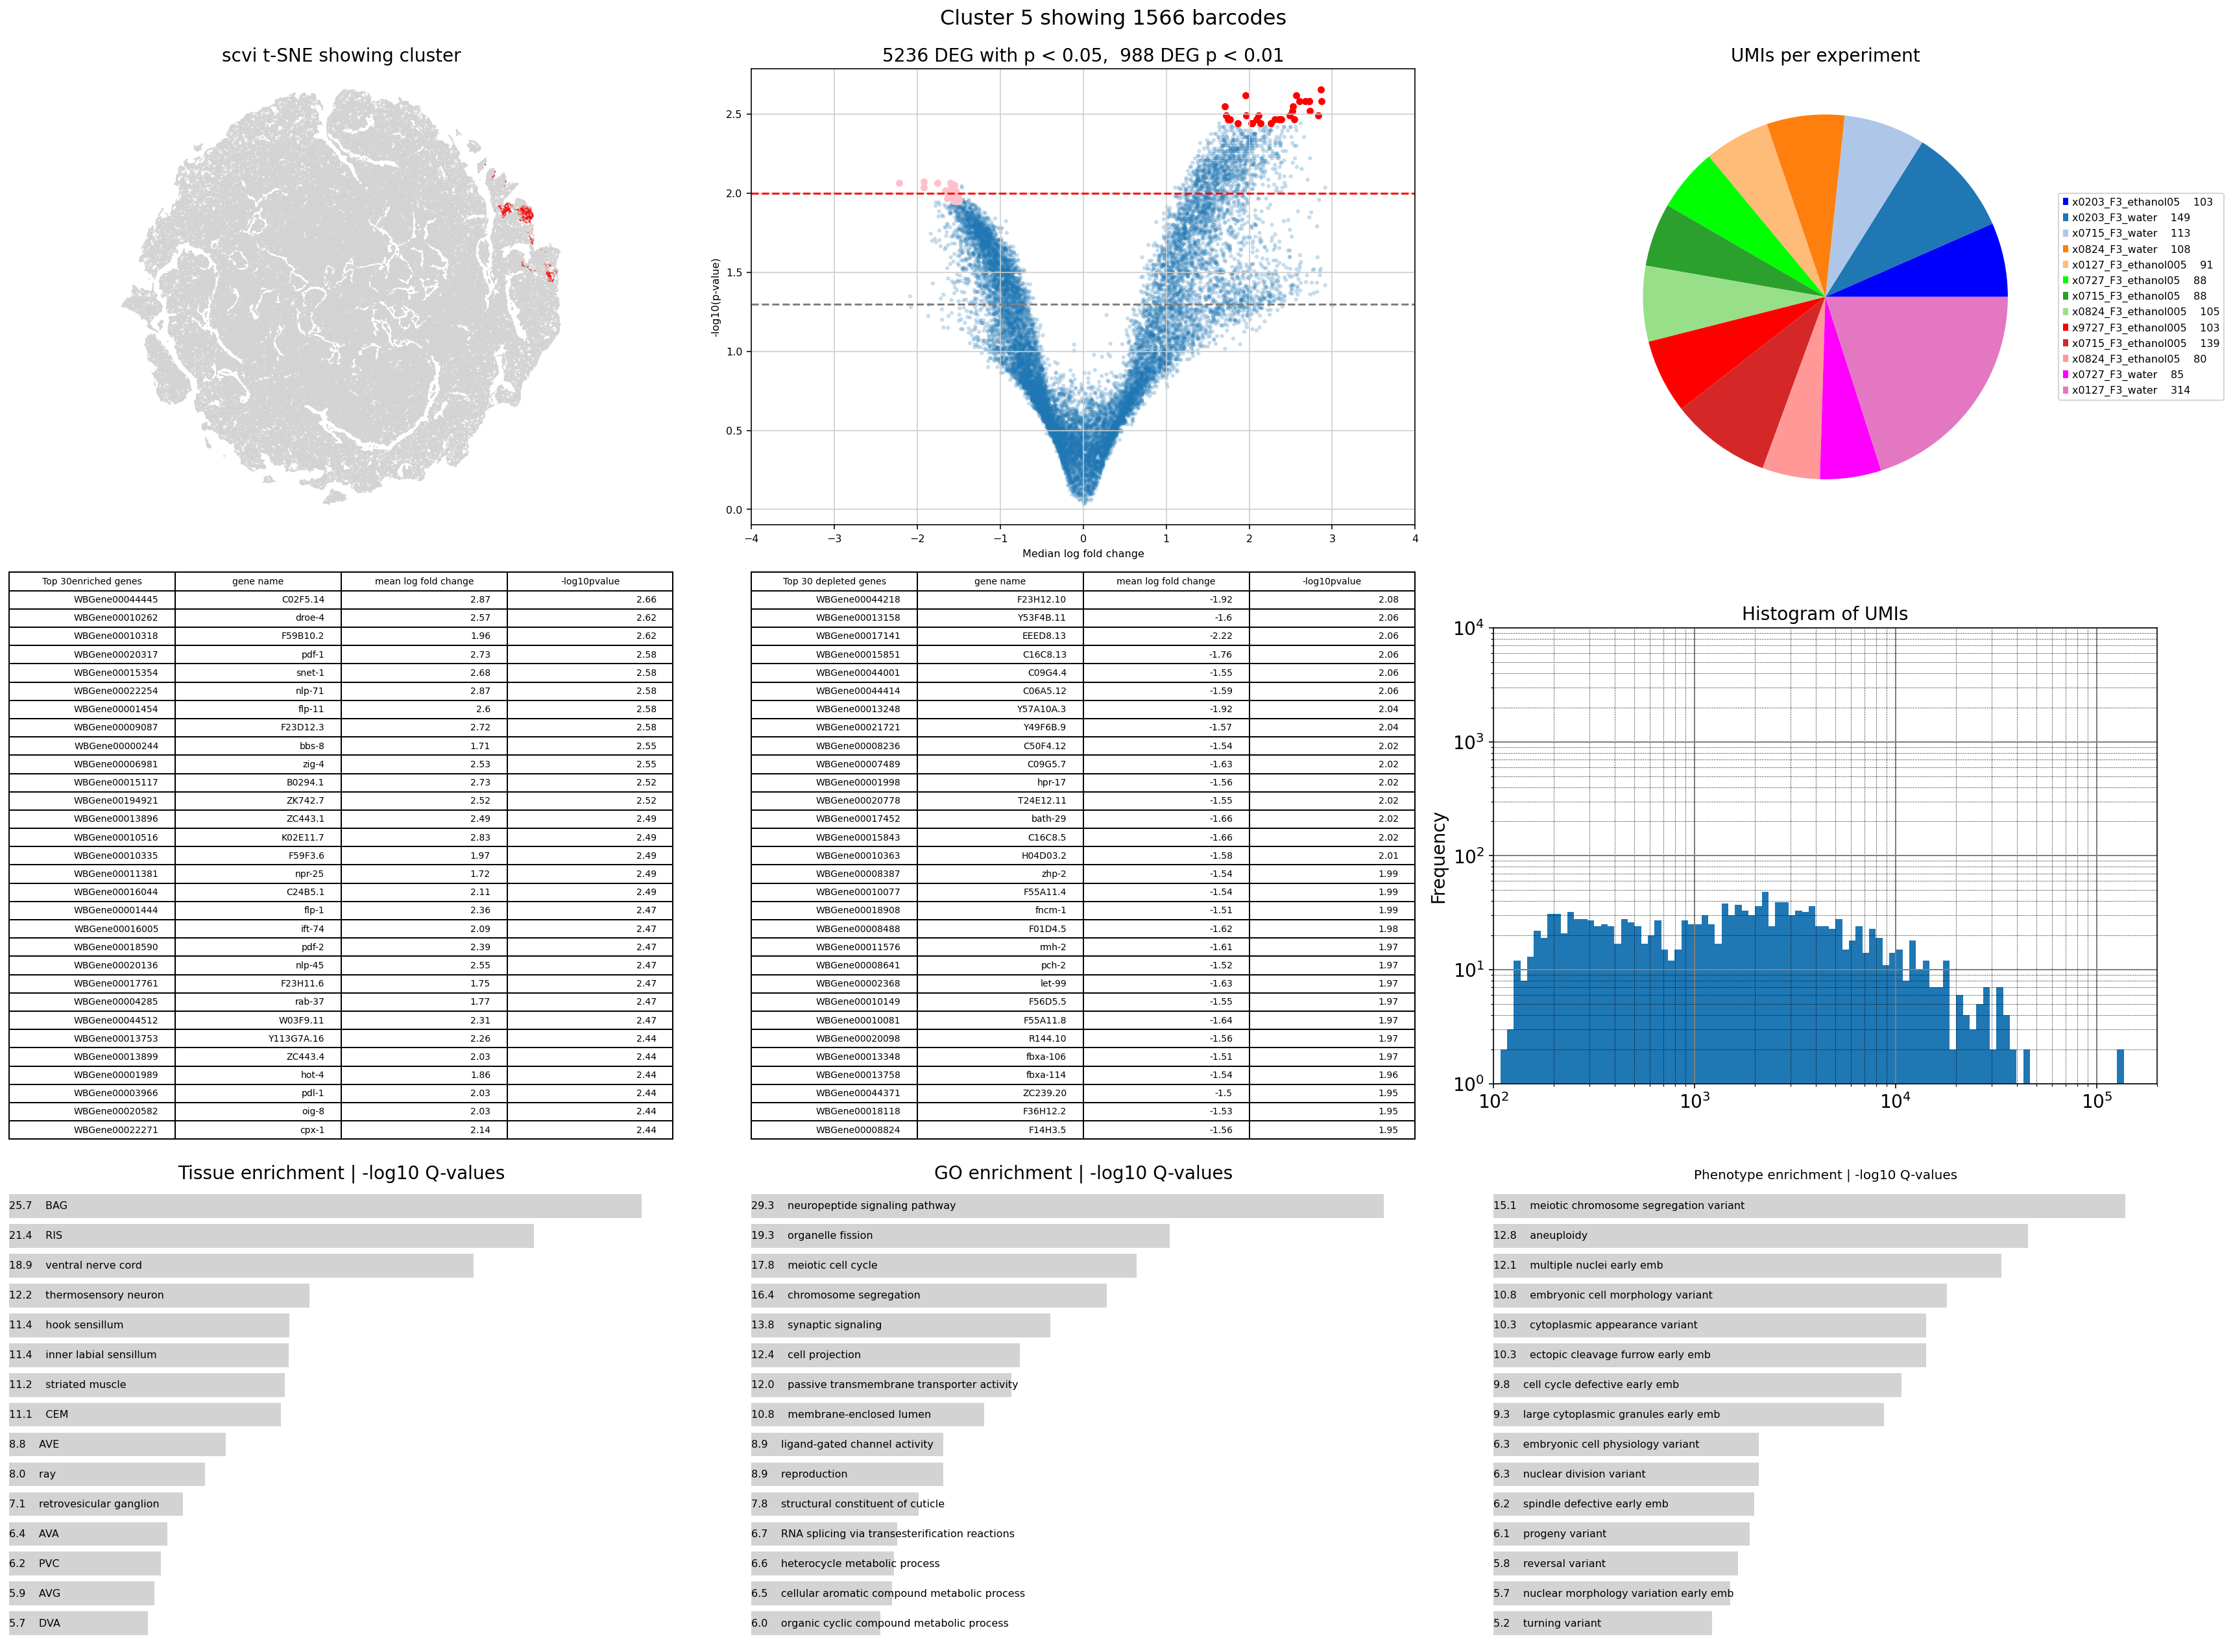

In [117]:
descriptions = pd.read_csv('../GENE-DESCRIPTION-TSV_WB_17.tsv', sep='\t', skiprows=15, names = ['wbid','gene_name','gene_description'])
descriptions['gene_id']=descriptions.wbid.str.split('WB:', expand=True)[1]
descriptions=descriptions.set_index('gene_id', drop=False)


dopecolors=[
'#0000ff','#1f77b4','#aec7e8','#ff7f0e','#ffbb78',
'#00ff00','#2ca02c','#98df8a','#ff0000','#d62728','#ff9896',
'#ff00ff','#e377c2','#434343','#d6d6d6',
'#bcbd22','#dbdb8d','#ffff00','#17becf','#9edae5',
'#9467bd','#c5b0d5','#8c564b','#c49c94',
]
de = allde.copy()
obs=adata.obs
shortnames=adata.obs.experiment.unique()

de = allde.copy()
# for cluster in (de.cluster.unique()):
for cluster in adata.obs[cluster_type].unique():
    cluster=5
    print('***** \n NOW DOING CLUSTER:', cluster)
    cluster_type = 'kmeans300'
    cluster_name=str(cluster)
    clustermask_obs = obs[cluster_type]==cluster
    print('CLUSTERMASK_OBS')
    print(sum(clustermask_obs))
    maskobs = obs[clustermask_obs]
    df = de[de['cluster']==cluster_name]
    df['-log10pvalue']=-np.log10(df.proba_not_de + 0.00001)
    
    
    top_enriched = df[(df['lfc_mean'] > 1.5)][df['proba_not_de'] < 0.1].sort_values(by='proba_not_de',ascending=True).head(30)
    te=pd.DataFrame()
    topn = str(len(top_enriched.index))
    te['Top '+topn+'enriched genes']=top_enriched.index
    te['gene name']=te['Top '+topn+'enriched genes'].map(descriptions['gene_name'])
    te['mean log fold change']=np.round(top_enriched['lfc_mean'], 2).values.astype(str)
    te['-log10pvalue']= np.round(top_enriched['-log10pvalue'], 2).values.astype(str)

    
    top_depleted = df[(df['lfc_mean'] < -1.5)][df['proba_not_de'] < 0.1].sort_values(by='proba_not_de',ascending=True).head(30)
    td=pd.DataFrame()
    topn = str(len(top_depleted.index))
    td['Top '+topn+' depleted genes']=top_depleted.index
    td['gene name']=td['Top '+topn+' depleted genes'].map(descriptions['gene_name'])
    td['mean log fold change']=np.round(top_depleted['lfc_mean'], 2).values.astype(str)
    td['-log10pvalue']= np.round(top_depleted['-log10pvalue'], 2).values.astype(str)
    
    
    
    df[df['lfc_mean'] > 0].head(15)
    markers = list(top_enriched.index.values) +list(top_depleted.index.values)
    if len(markers)<5: markers=df.head(10).index
    gp = GProfiler(return_dataframe=True)
    res = gp.profile(organism='celegans',
                query=list(markers))
#     display(res[['source','native','name','p_value','description']])
    significant = df[(df.proba_not_de < 0.05)]

    print(len(significant), ' significant DEG')
    if len(significant)<10: 
        significant = df.head(10).copy()
        print('Less than 10 significant DEG, using top 10 DEG...')

    significant['gene_id']=significant.index.map(descriptions['gene_id'])

    obs = adata.obs

    nrow = 3
    ncol = 3
    figh = nrow * 6
    fig = plt.figure(figsize=(ncol*8, nrow*6))


    
    
#     pivotdf=maskobs[['shortname','mitofrac']]
#     pivotdf = pivotdf.pivot(columns='shortname')
#     my_colors = list(islice(cycle(dopecolors), None, len(pivotdf)))    
    
    ### PLOT 1 - TSNE 
    plt.subplot(nrow, ncol, 1)
    ax = plt.gca() 
    ax.set_aspect('equal')
    plt.scatter(obs['tsne0'],obs['tsne1'], c='lightgrey', edgecolors='none', s=0.5, rasterized=True)
    plt.scatter(obs[clustermask_obs]['tsne0'],obs[clustermask_obs]['tsne1'][clustermask_obs], c='red', edgecolors='none', s=0.5, alpha = 0.5, rasterized=True)
    plt.title('scvi t-SNE showing cluster')
    plt.axis("off")
    plt.box(on=None)

    ### PLOT 2 - VOLCANO
    fig.set_tight_layout(True)
    plt.subplot(nrow, ncol, 2)
    plt.scatter(df['lfc_mean'], df['-log10pvalue'], s = 10, alpha = 0.25, edgecolors='none', rasterized=True)
    plt.axhline(y=1.3, color = 'gray', ls = '--')
    axhline(y=2, color  = 'red', ls='--')

    plt.scatter(top_enriched['lfc_mean'], top_enriched['-log10pvalue'], color='red', s = 20, rasterized=True)
    plt.scatter(top_depleted['lfc_mean'], top_depleted['-log10pvalue'], color='pink', s = 20, rasterized=True)
    plt.xlabel('Median log fold change', fontsize=8)
    plt.ylabel('-log10(p-value)', fontsize=8)
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tick_params(axis='both', which='minor', labelsize=8)
    title = (f''' {(df.proba_not_de < 0.05).sum()} DEG with p < 0.05,  {(df.proba_not_de < 0.01).sum()} DEG p < 0.01 ''')
    plt.title(title)

#     for idx, row in top_enriched.iterrows():
#         ax.annotate(idx,( row['lfc_median'], row['-log10pvalue']), fontsize = 10)
#     texts = [plt.text(row['lfc_median'], row['-log10pvalue'], idx, ha='center', va='center') for idx, row in top_enriched.iterrows()]
#     adjust_text(texts, arrowprops=dict(arrowstyle='-', color='red'))
    
    lim = df['lfc_mean'].abs().max() *1.1
    plt.xlim([-lim,lim])
    if lim < 4: plt.xlim([-4,4])
        

    ### PLOT 3 - UMI PIECHART
    plt.subplot(nrow, ncol, 3)

    ax = plt.gca()    
    piedata=[]
    pienames=[]
    for shortname in shortnames:
        ncounts= len(maskobs[maskobs['shortname']==shortname])
        piedata.append(ncounts)
        pienames.append(shortname + '    ' + str(ncounts))
    ax.set_prop_cycle( cycler('color',dopecolors))
    wedges, texts = ax.pie(piedata)
    ax.legend(wedges, pienames,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1),
              fontsize=8)

    ax.set_title("UMIs per experiment")
    
    
    ### PLOT 4 - ENRICHED LIST
    plt.subplot(nrow, ncol, 4)
    ax = plt.gca()
    
    ax.axis('tight')
    ax.axis('off')
    if len(te)==0: te=pd.DataFrame.from_dict({'No genes significantly enriched':[' ']}) 
    the_table = ax.table(cellText=te.values,colLabels=te.columns,loc='center')
#     ax.set_title('Top 30 enriched genes')
    
#     mitodf = maskobs[['shortname','mitofrac']].pivot(columns='shortname')
#     mitodf.plot.hist(stacked=True, bins=100, density=False, range=[0,1], color=my_colors, grid=False, zorder=3, ax=ax, legend=None)
#     plt.grid(zorder=0, ls = ':')
#     plt.xlim([0,1])
#     plt.title('Mitochondrial gene fraction')

    fig.set_tight_layout(True)

    ### PLOT 5 - DEPLETED LIST
    plt.subplot(nrow, ncol, 5)
    ax = plt.gca()
    
    ax.axis('tight')
    ax.axis('off')
    if len(td)==0: td=pd.DataFrame.from_dict({'No genes significantly depleted':[' ']}) 
    the_table = ax.table(cellText=td.values,colLabels=td.columns,loc='center')

#     ribodf = maskobs[['shortname','ribofrac']].pivot(columns='shortname')
#     ribodf.plot.hist(stacked=True, bins=100, density=False, range=[0,1], color=my_colors, grid=False, ax=ax, legend=None)
#     plt.grid(zorder=0, ls = ':')
#     plt.title('Ribosomal gene fraction')
#     plt.xlim([0,1])

    ### PLOT 6 - UMI HIST
    plt.subplot(nrow, ncol, 6)

    ax = plt.gca()    
    umisdf = maskobs[['shortname','umis']].pivot(columns='shortname')

    maskobs.umis.plot.hist(stacked=False, bins=np.logspace(np.log10(100),np.log10(200000), 100), 
                           density=False,  loglog =True, grid=True, ax=ax)

    plt.grid(which='major', linestyle='-', linewidth='1', color='gray')
    # Customize the minor grid
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

    plt.ylim([1,10000])

    plt.xlim([100,200000])

    plt.title('Histogram of UMIs')   
    
    ### PLOT 10 - TISSUE EA
    plt.subplot(nrow, ncol, 7)
    ax = plt.gca()    
    try:
        tissue_dict = tea.fetch_dictionary('tissue')
        tea_tissue = tea.enrichment_analysis(significant.gene_id, tissue_dict, show=False, alpha = 0.1)
        tea_tissue['name']=tea_tissue.Term.str.split('WBbt:', expand=True)[0]
        tea_tissue['-log10 Q-value']=-np.log10(tea_tissue['Q value'])

        tea_df=tea_tissue.head(15).iloc[::-1]
        tea_df.plot(x='name',y='-log10 Q-value',kind="barh", legend=False, width=0.8 , color = 'lightgray', ax=ax)
        for i, (name, qval) in enumerate(zip(tea_df['name'], tea_df["-log10 Q-value"].round(1).astype(str))):
            plt.text(s=qval + '    ' + name, x=0, y=i, color="k", verticalalignment="center", size=8)
        plt.axis("off")
        plt.tight_layout()
        ax.set_title('Tissue enrichment | -log10 Q-values')
    except:
        plt.xticks([])
        plt.yticks([])
        ax.set_title('Nothing found on tissue enrichment analysis')
        
    ### PLOT 11 - GO EA
    plt.subplot(nrow, ncol, 8)
    ax = plt.gca()    
    try:
        go_dict = tea.fetch_dictionary('go')
        tea_go = tea.enrichment_analysis(significant.gene_id, go_dict, show=False, alpha = 0.1)
        tea_go['name']=tea_go.Term.str.split('GO:', expand=True)[0]
        tea_go['-log10 Q-value']=-np.log10(tea_go['Q value'])

        tea_df=tea_go.head(15).iloc[::-1]
        tea_df.plot(x='name',y='-log10 Q-value',kind="barh", legend=False, width=0.8 , color = 'lightgray', ax=ax)
        for i, (name, qval) in enumerate(zip(tea_df['name'], tea_df["-log10 Q-value"].round(1).astype(str))):
            plt.text(s=qval + '    ' + name, x=0, y=i, color="k", horizontalalignment='left', verticalalignment="center", size=8)
        plt.axis("off")
        plt.tight_layout()
        ax.set_title('GO enrichment | -log10 Q-values')
    except:
        plt.xticks([])
        plt.yticks([])
        ax.set_title('Nothing found on GO analysis')
    
    ### PLOT 12 - PHENOTYPE EA
    plt.subplot(nrow, ncol, 9)

    ax = plt.gca()
    try:
        phenotype_dict = tea.fetch_dictionary('phenotype')
        tea_phenotype = tea.enrichment_analysis(significant.gene_id, phenotype_dict, show=False, alpha = 0.1)
        tea_phenotype['name']=tea_phenotype.Term.str.split('WBPhenotype:', expand=True)[0]
        tea_phenotype['-log10 Q-value']=-np.log10(tea_phenotype['Q value'])
        tea_df=tea_phenotype.head(15).iloc[::-1]
        tea_df.plot(x='name',y='-log10 Q-value',kind="barh", legend=False, width=0.8 , color = 'lightgray', ax = ax)
        for i, (name, qval) in enumerate(zip(tea_df['name'], tea_df["-log10 Q-value"].round(1).astype(str))):
            plt.text(s=qval + '    ' + name, x=0, y=i, color="k", verticalalignment="center", size=8)

        plt.axis("off")

        plt.tight_layout()
        ax.set_title('Phenotype enrichment | -log10 Q-values', fontsize=10)
    except:
        plt.xticks([])
        plt.yticks([])
        ax.set_title('Nothing found on phenotype analysis')
    
    plt.suptitle('Cluster ' + cluster_name + ' showing ' + str(len(maskobs)) + ' barcodes \n ', fontsize=16)
    
    
    filename = './reports/' + cluster_name + '.pdf'
    plt.savefig(filename, dpi=150, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    print('saved:', filename)
    
    
    # first we create these variables to customize the hover text in plotly's heatmap
# the text needs to be arranged in a matrix the same shape as the heatmap
    # for the gene descriptions text, which can be several sentences, we add a line break after each sentence
    df['gene_description']=df.index.map(descriptions['gene_description'])

    df['gene_description_html'] = df['gene_description'].str.replace('\. ', '.<br>')

    fig = go.Figure(
                    data=go.Scatter(
                              x=df["lfc_mean"].round(3)
                            , y=df["-log10pvalue"].round(3)
                            , mode='markers'
    #                         , opacity=0.5
                            , marker=dict(color='Green')
                            , hoverinfo='text'
                            , text=df['gene_description_html']
                            , customdata=df.index.values + '<br>'
                            , hovertemplate='%{customdata} <br>' +
                                            '-log10pvalue %{y}<br>' +
                                            'Log fold change: %{x}' +
                                            '<extra>%{text}</extra>'
                            )
                            , layout= {
                                    "title": {"text":
                                              "DE of cluster " + str(cluster) 

                                              , 'x':0.5
                                             }
                                    , 'xaxis': {'title': {"text": "Log fold change"}}
                                    , 'yaxis': {'title': {"text": "-log10 p-value"}}
                            }
                   )
    # uncomment line below to save the interactive volcano plot as html
    fig.write_html('./reports/'+ str(cluster) + '_interactive_volcano.html')
    print('saved html')
    break



    
